# Feature Scaling and Normalization - Lab

## Introduction
In this lab, you'll practice your feature scaling and normalization skills!

## Objectives
You will be able to:
* Identify if it is necessary to perform log transformations on a set of features
* Perform log transformations on different features of a dataset
* Determine if it is necessary to perform normalization/standardization for a specific model or set of data
* Compare the different standardization and normalization techniques
* Use standardization/normalization on features of a dataset

## Back to the Ames Housing data

Let's import our Ames Housing data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

ames = pd.read_csv('ames.csv')

## Look at the histograms for the continuous variables

Since there are so many features it is helpful to filter the columns by datatype and number of unique values. A heuristic you might use to select continous variables might be a combination of features that are not object datatypes and have at least a certain amount of unique values.

In [2]:
def select_cont_vars(data):
    # select features that are not 'object' type
    non_obj_cols = data.select_dtypes(exclude=['object']).columns
    
    # select features with more than 15 unique values
    outputs = list(filter(lambda col: (data[col].nunique() > 15 and col != 'Id'), non_obj_cols))
    return data[outputs]

In [3]:
# Apply select_cont_vars on 'ames'
cont_df = select_cont_vars(ames)

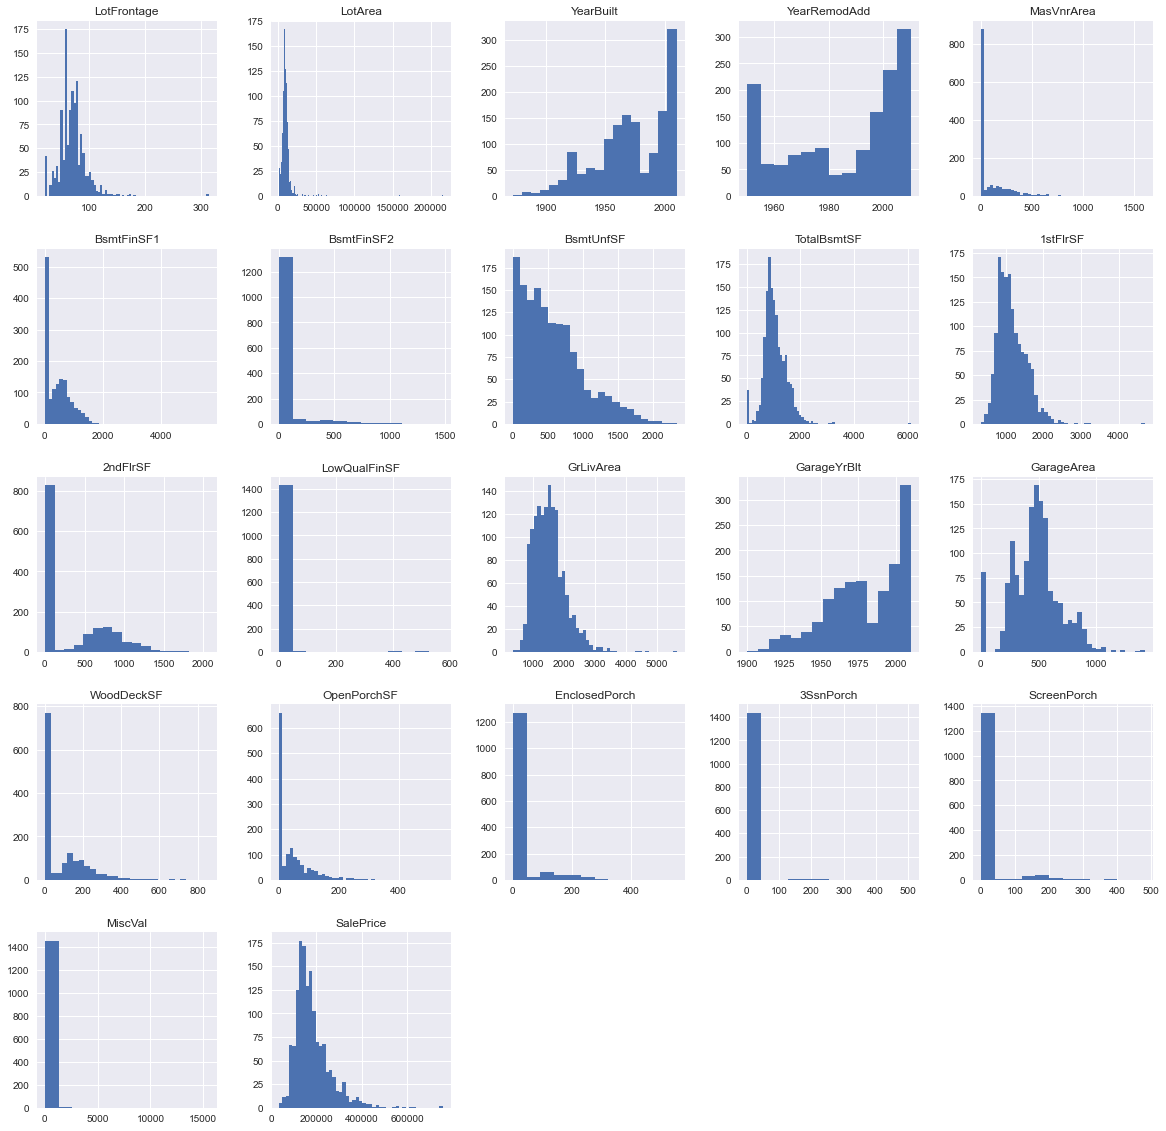

In [4]:
# Histograms of these selected continuous features
cont_df.hist(figsize=[20,20], bins='auto');

We can see from our histogram of the contiuous features that there are many examples where there are a ton of zeros. For example, WoodDeckSF (square footage of a wood deck) gives us a positive number indicating the size of the deck and zero if no deck exists. It might have made sense to categorize this variable to "deck exists or not (binary variable 1/0). Now you have a zero-inflated variable which is cumbersome to work with.

Lets drop these zero-inflated variables for now and select the features which don't have this characteristic.

In [5]:
def rm_zero_inflated(dt):
    # initiate output list
    out_lst = []
    # iterate through dt.columns
    for c in dt.columns:
        # if that column does not contain value '0' --> append it to output list
        if 0 not in dt[c].unique():
            out_lst.append(c)
        # if column does contain value '0'
        else:
            # check if '0' is also the mode of that column
            if (0 in dt[c].unique()) and (dt[c].mode()[0] != 0):
                # if no --> append to output list
                out_lst.append(c)
            
    return dt[out_lst]

In [6]:
# Select non zero-inflated continuous features as ames_cont
ames_cont = rm_zero_inflated(cont_df)

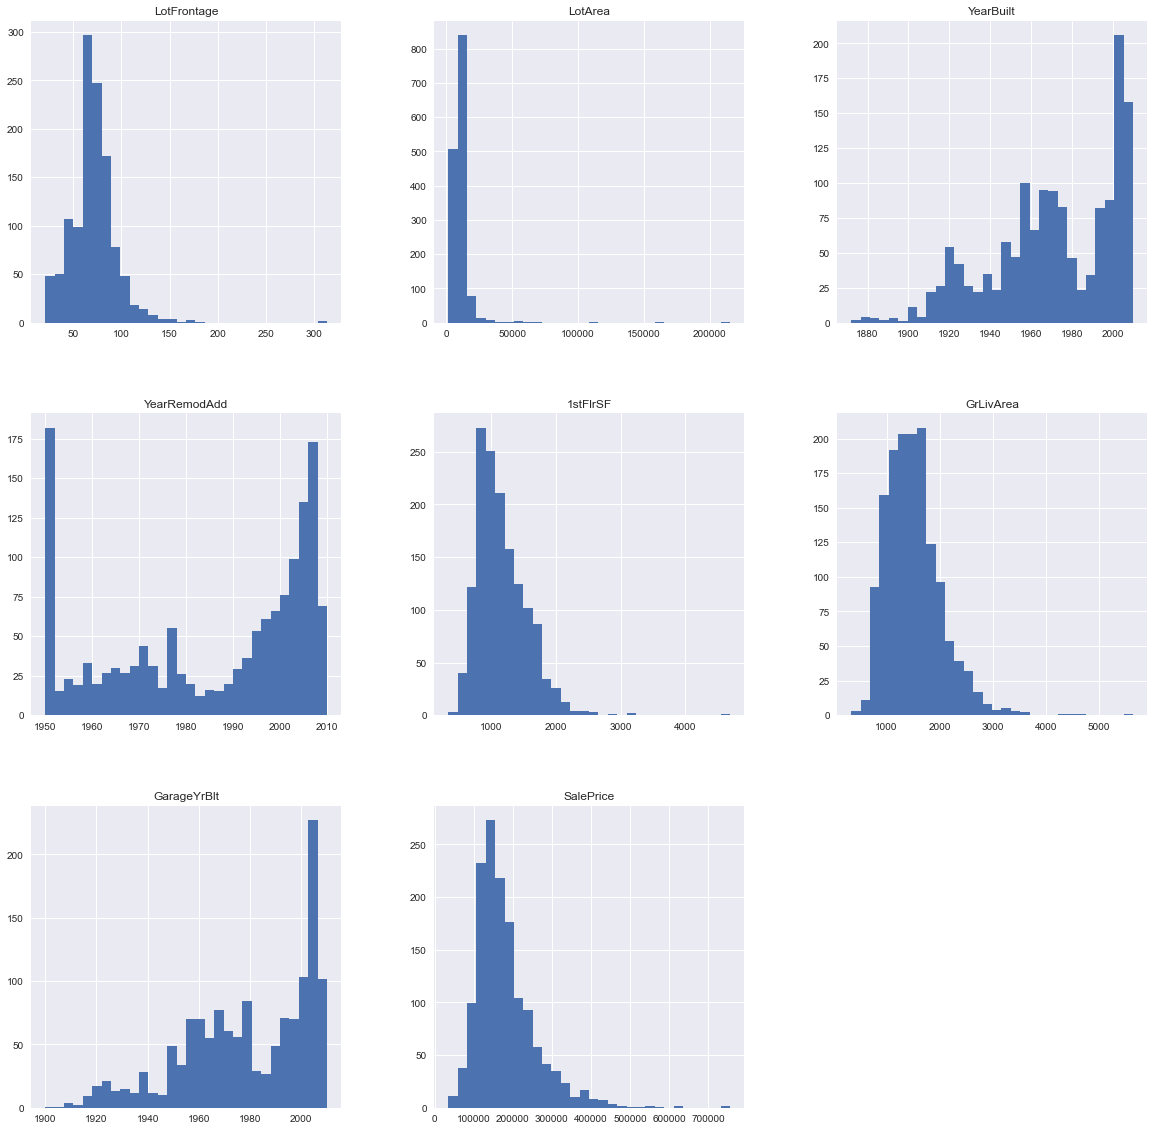

In [7]:
ames_cont.hist(figsize=[20,20], bins=30);

## Perform log transformations for the variables where it makes sense

In [8]:
# Your code here
# create log_transform function for the whole dataframe
# takes 2 arguments: 
# - 1st arg is a list of columns to be transformed
# - 2nd arg is the dataframe
def log_transform(cols, dt):
    dt_log = pd.DataFrame([])
    for c in cols:
        dt_log[f'log_{c}'] = np.log(dt[c])
    return dt_log

# Only applying log transformation on certain features 
# (since applying log on year-related features would not make sense)
log_lst = ['LotArea', 'LotFrontage', '1stFlrSF', 'GrLivArea']
ames_log = log_transform(log_lst, ames_cont)

In [9]:
# Separating year-related features
ames_yrs = ames_cont[['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']]

## Standardize the continuous variables

Store your final features in a DataFrame `features_final`: 

In [10]:
def standardize(x):
    return (x - np.mean(x)) / np.std(x)

In [13]:
features_final = pd.concat([ames_log, ames_yrs], axis=1).apply(standardize)

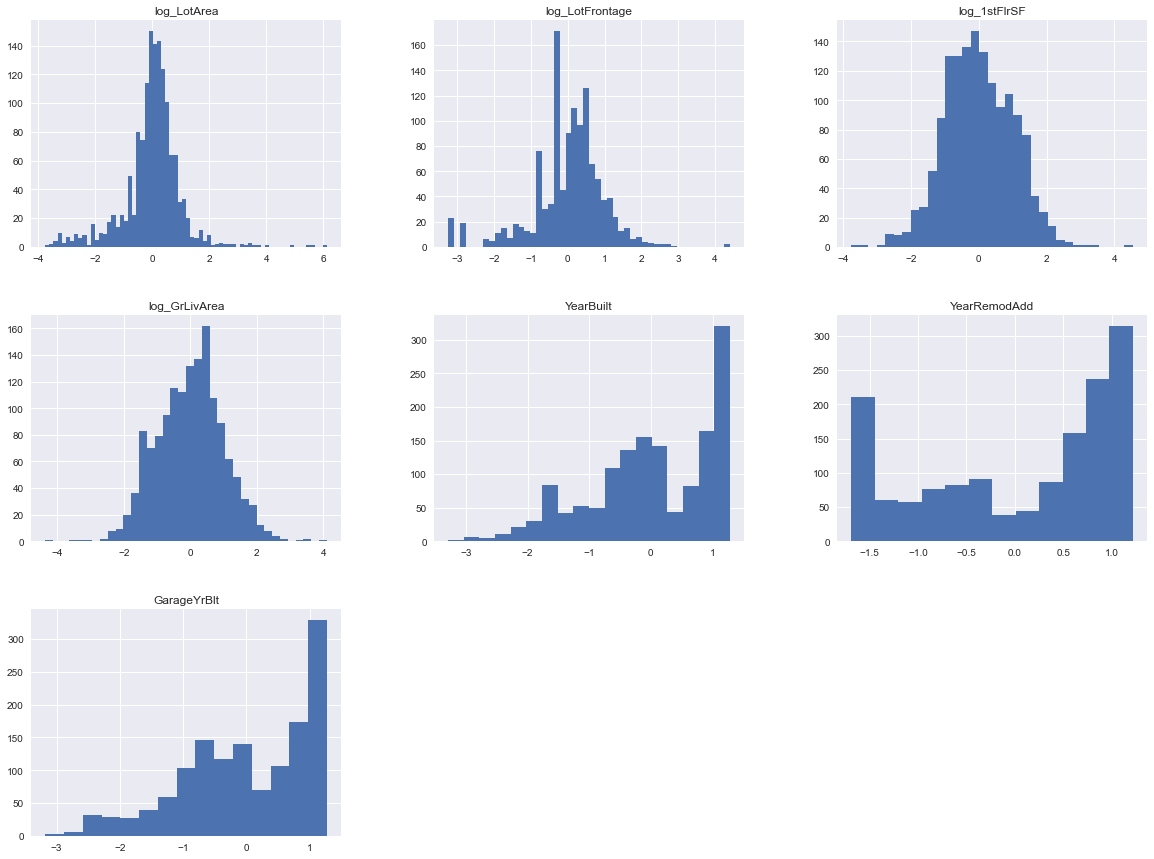

In [14]:
features_final.hist(figsize=(20, 15), bins='auto');

## Summary
Great! You've now got some hands-on practice transforming data using log transforms, feature scaling, and normalization!